Layer Normalization

In [ ]:
import torch
from torch import nn

Inputs:

- Hello : [0.2, 0.1, 0.3]
- World : [0.5, 0.1, 0.1]

Batch = 1

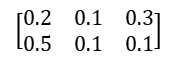

Calculate the Mean for each Sequence.

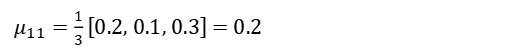

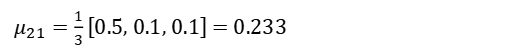

Calculate the Variance for each Sequence.

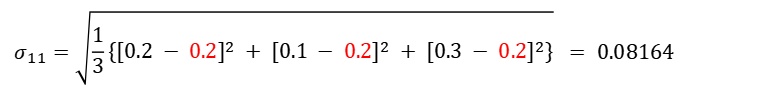

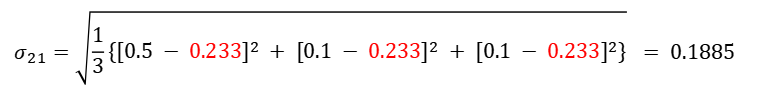

In Matrix...

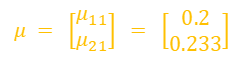

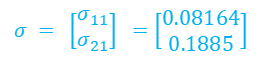

Calculate y

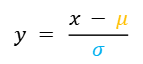

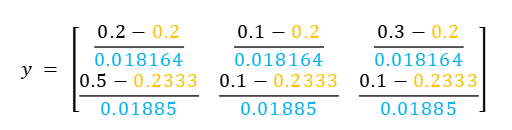

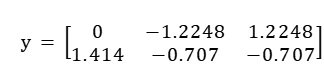

Output

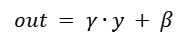

In [ ]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3], [0.5, 0.1, 0.1]]])
B, S, E = inputs.size()
inputs = inputs.reshape(S, B, E)
inputs.size()

torch.Size([2, 1, 3])

In [ ]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape))
beta =  nn.Parameter(torch.zeros(parameter_shape))

In [ ]:
gamma.size(), beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [ ]:
dims = [-(i + 1) for i in range(len(parameter_shape))]
dims

[-1, -2]

In [ ]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [ ]:
mean

tensor([[[0.2000]],

        [[0.2333]]])

In [ ]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (var + epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [ ]:
y = (inputs - mean) / std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [ ]:
out = gamma * y + beta
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

In [ ]:
import torch
from torch import nn

class LayerNormalization():
    def __init__(self, parameters_shape, eps=1e-5):
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, input):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation \n ({std.size()}): \n {std}")
        y = (inputs - mean) / std
        print(f"y \n ({y.size()}) = \n {y}")
        out = self.gamma * y  + self.beta
        print(f"out \n ({out.size()}) = \n {out}")
        return out

In [ ]:
batch_size = 3
sentence_length = 5
embedding_dim = 8
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}) = \n {inputs}")

input 
 (torch.Size([5, 3, 8])) = 
 tensor([[[ 0.2358, -0.2503, -1.3074,  0.9831, -0.4678,  0.1978, -1.0144,
           0.6721],
         [-0.0359,  0.2908,  0.5676,  1.0494,  1.4400, -0.2343,  3.2706,
           0.3939],
         [-0.4312,  1.4796, -0.6506, -2.4167, -0.1204, -2.0392,  0.6092,
           0.5957]],

        [[ 0.9207, -0.5059,  0.8840, -0.6799,  1.0884, -0.4000,  0.4422,
           0.4978],
         [-0.1776,  0.5780,  0.6785, -0.1030,  0.3570,  0.0255, -0.8967,
          -0.7355],
         [-0.0636,  1.3353, -2.2364,  0.3872, -1.3379, -0.4597, -0.1684,
          -0.4436]],

        [[-0.0809, -0.3825, -1.3964,  0.3622, -0.2054,  0.7351, -1.1728,
          -0.6046],
         [ 0.0231,  2.0690,  0.6895, -0.8884, -0.7032, -0.5427,  0.4445,
          -0.2630],
         [-0.3549, -0.9019, -0.5514, -1.7509,  0.7631,  0.2229, -0.0689,
          -0.3750]],

        [[-0.0224,  0.0922,  0.5388, -0.6697,  0.3389, -1.1421, -2.4795,
           0.7100],
         [-0.1950,  0.0283, 

In [ ]:
out[0].mean(), out[0].std()

(tensor(3.9736e-08, grad_fn=<MeanBackward0>),
 tensor(1.2238, grad_fn=<StdBackward0>))